In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

### Review of lecture 8

In lecture 8 we learned:

1) about the basic file system of most computers

2) how to find your command line 

3) how to write some simple commands from within a jupyter notebook 

4) how to write some simple commands from the command line

5) about the _path_ to a file 

#### In this lecture we will learn:

1)  more about **matplotlib**:  adding notes and saving images.

2) about DataFrames and Series, two new _data structures_, that are part of the **Pandas** package.   

3) some basic filtering tricks with Pandas

4) how to save a data file with **Pandas**



### More tricks in matplotlib.   

A few lectures ago we read in the record of an earthquake and plotted it: 

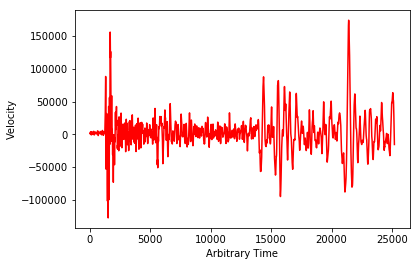

In [2]:
EQ=np.loadtxt('Datasets/seismicRecord/earthquake.txt') # read in data
plt.plot(EQ,'r-') # plots as a red line
plt.xlabel('Arbitrary Time') # puts a label on the X axis
plt.ylabel('Velocity'); # puts a label on the Y axis

There are a few things that can be improved about this plot:

1) What are the  time units?  

2) Seismologists can recognize the arrival of different phases, the "P" wave (for primary) and the "S" wave (for secondary).   It would be nice to label the P and S wave arrivals. 



So let's start with point one, converting the arbitrary time units to minutes. 


The measurement rate of this seismometer was 20 measurements per second. Let's convert this to minutes.  First we'll need to create a data structure (say, an array) of the original "arbitrary time" and then convert "arbitrary time"  to minutes by dividing by 1200:

$20{\hbox{measurement}\over {\hbox{second}}} \times 60 {\hbox{second}\over {\hbox{minute}}} =1200 {\hbox{measurement}\over {\hbox{minute}}}$.

To create a data structure of 'arbitrary time' with the same length as the original array, we can use the built-in **len( )** function which gives us the length of a list or a 1D array, then use **np.arange( )** to give us an array from 0 to the length of the array.  Because it is an array, we can divide the whole array by 1200 to create a new array that is in minutes.  
We can then plot the minutes on the X-axis and the accelerations on the Y-axis:





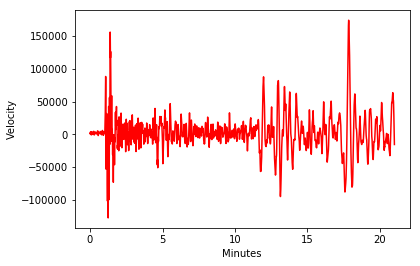

In [3]:
velocity=np.loadtxt('Datasets/seismicRecord/earthquake.txt') # read in data
# remember np.arange?  it makes an array that is N long.
# here, we want N to be the length of the acceleration array, so len(acceleration)
time_units=np.arange(len(velocity)) # makes an array of arbitrary time units
# now I want an array that is normalized to minutes: 
minutes=time_units/1200. # sampling rate=20/sec = 1/1200 minutes
# the plt.plot method can plot X, versus Y with plt.plot(X,Y), so:
plt.plot(minutes,velocity,'r-') # plots X=Minutes, Y= acceleration as a red line
# we can change the labels to reflect the new reality:
plt.xlabel('Minutes') # puts a label on the X axis
plt.ylabel('Velocity'); # puts a label on the Y axis


There is something you need to notice in the above script. 
Did you see you we just took the time_units array and divided it by 1200?  1200 is  a scalar, so each element is divided by 1200.  Try that with a list! We can make a list with **range( )** that is very similar to time_units but a list, not an NumPy array, but if we try to divide it by scalar, we get an error! 

In [5]:
list_of_units= range(360)
list_of_units/1200.

TypeError: unsupported operand type(s) for /: 'range' and 'float'

That is one big advantage of arrays over lists.   

### Saving plots and putting  notes on

Saving turns out to be easy with the **plt.savefig( )** method.  The argument is the desired filename (including any directory names if desired).  

It would also be handy to label the 'P' and 'S' wave arrivals.  You may remember that the first wave that hits a station is the 'P' wave (for primary).  The second wave is the 'S' wave (for secondary).  P waves are 'compressional' waves, while the S waves are 'shear' waves. They are a bit slower, which is why they arrive second.  So, let's label the arrivals in our plot.

To put notes on a figure, we use **plt.text( )** which has many options. Check out this web site for hints on making beautiful notes:  

http://matplotlib.org/users/text_props.html

So the keyword arguments we want are 'rotation' which allows us to rotate the note by some angle (say, 90), and the vertical (verticalalignment or va)	and horizontal (horizontalalignment or ha) alignments with respect to the x and y values given.  

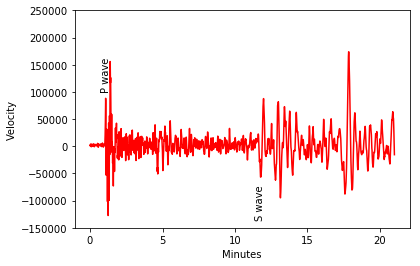

In [6]:
# same plot as before: 
plt.plot(minutes,velocity,'r-') # plots as a red line
plt.xlabel('Minutes') # puts a label on the X axis
plt.ylabel('Velocity') # puts a label on the Y axis
# here I add a few more decorations with the plt.text method
plt.text(1.08,100000, "P wave",rotation=90,va='bottom',ha='center') # put on the P wave label
plt.text(11.76,-70000, "S wave",rotation=90,va='top',ha='center') # put on the S wave label
plt.ylim([-150000,250000]) # increase vertical axis bounds to include S wave label
plt.savefig('seismogram.png') # let's just save this as a png file.

### Practice with notes

- Recreate the above plot, but change the color of the notes to blue.
- Put a  note at about x=4 and y=100000 which says 'P-S delay interval'
- While you are at it, put on a title that says, 'Earthquake observed at Pinyon Flat Observatory'. 

### Let's do some seismology!

The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves.  This makes sense if you think about racing a little kid (who is on a tricycle) around a track.  The distance between you will just keep increasing as you run because the kid on the trike is slower (like the S wave).

You can use the difference between the arrival times of the two waves to calculate the distance to the earthquake source, if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave.  

There are plenty of data on earthquakes and the arrival times of different waves. Here is a short video demonstration. 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created



Now we can look at some data from the model for the Earth.  I  found just what we want at this website:  https://earthquake.usgs.gov/learn/topics/ttgraph.php and saved it in Datasets/TravelTimeDelta.txt  

Let's take a look at the contents of the file.  Here we need to learn another Unix command,  **head** (remember that we need to pre-pend a ! to run it in the notebook).  **head** just prints out the top 10 lines in a file.  

In [15]:
!head Datasets/TravelTimeDelta/DeltaTime.txt

https://earthquake.usgs.gov/learn/topics/ttgraph.php
Delta Time of P  S-P Time
  Deg   M   S     M   S
  0.0   0   5.4   0   4.0
  0.5   0  10.6   0   7.8
  1.0   0  17.7   0  13.5
  1.5   0  24.6   0  19.0
  2.0   0  31.4   0  24.4
  2.5   0  38.3   0  29.9
  3.0   0  45.2   0  35.4


While we are at it, we can look at the last 10 lines with **tail**.  

In [16]:
!tail Datasets/TravelTimeDelta/DeltaTime.txt

 96.0  13  23.6  11  16.1
 97.0  13  28.1  11  20.1
 98.0  13  32.6  11  24.1
 99.0  13  37.0  11  28.1
100.0  13  41.5  11  32.0
101.0  13  45.9  11  35.8
102.0  13  50.4  11  39.7
103.0  13  54.8  11  43.6
104.0  13  59.2  11  47.5
105.0  14   3.7  11  51.4


The first line in our dataset contains WORDS in it, so we can't read it in with **np.loadtxt**.  Of course we could edit the text file and remove the words, but we don't have to because instead, we can use **Pandas**, a useful package in Python.  



### The Joy of Pandas

Pandas is a relatively new package for Python (a few years old).  It allows us to read in more complicated data file formats than **NumPy**, and  wrangle the data in powerful ways. It also provides many useful data analysis tools.  But it is a bit complicated, so we will start out slow.  


There are two basic data structures in **Pandas**, the **DataFrame**, which is basically a spreadsheet with multiple columns and the **Series** which is a single column of data. 

The DeltaTime file includes the website where I got the original data at the top of the file, a description in line 2, and then some column headers in line 3.  This kind of file does not play nicely with **np.loadtxt()**,  but we can use the **Pandas function**, **read_csv()** to read in the datafile.  This function not only reads in 'comma separated variable' files (.csv), but also other data formats once we tell it how the file is delimited.  

Of course we must first import **Pandas** into the notebook:

In [17]:
import pandas as pd

A few things you need to know.  

- We need to skip the first two rows. We use the keyword argument **skiprows=2** to do that. 
- **pd.read_csv( )** reads 'comma separated variables' by default but this file is 'whitespace' delimited.  The keyword argument **delim_whitespace=True** will split on white space (spaces or tabs).
- the header is in the third row.  Python starts counting from zero,  but we skipped two rows, so **header=0** will read in the first  row  after the skipped rows as the header.



In [18]:
DeltaTimeData=pd.read_csv('Datasets/TravelTimeDelta/DeltaTime.txt',\
                          delim_whitespace=True,skiprows=2,header=0)
# we specify the path of the file (relative to our current directory), 
# then all the other arguments.
DeltaTimeData.head() # this is "panda-ish" for looking at the "head" of the DataFrame  

,Deg,M,S,M.1,S.1
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


**DeltaTimeData** is now a Pandas **DataFrame**.  

So what is a **DataFrame**?   It is a new data structure that is more sophisticated than any we have learned about so far (lists, tuples, sets, dictionaries, arrays).   
It can have named columns and identifies the rows by _indices_ starting with 0. 

The file we read in had column headers in it and we told Pandas which line they were in (with the header argument).  

If we want to be sure, we can use the **DataFrame.columns** attribute on the DeltaTimeData DataFrame:


In [19]:
DeltaTimeData.columns

Index(['Deg', 'M', 'S', 'M.1', 'S.1'], dtype='object')

We see that the  columns are "Deg", which is degrees away from the source (the angle from the center of the Earth).  "M" is the time of the P wave arrival in minutes, S is P wave arrival in seconds.  M.1 is the differece in the P and S wave arrival time in  minutes and S.1 is same interval in seconds.  Each one of these columns is a **Pandas Series.**

If we'd like, we can change the column names by setting **Series.columns** to a list with the new column names: 

In [20]:
DeltaTimeData.columns=['Degrees','P_wave_minutes',\
                       'P_wave_seconds','S-P_minutes','S-P_seconds']
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


To save a DataFrame to a file, we use the **to_csv** method: 

In [21]:
DeltaTimeData.to_csv('PSArrival.csv')

There are many other file formats besides 'comma separated variable' (.csv) which can be saved using the **sep** argument (for example sep='\t' makes it a tab delimited (separated) file: 

In [22]:
DeltaTimeData.to_csv('PSArrival.txt',sep='\t')

### Practice with Panda DataFrames
- Import the file 'PSArrival.txt' into a panda DataFrame and call it arrivalPractice
- Get acquainted with the DataFrame:
        - print out the columns of arrivalPractice
        - print out the first few lines of the DataFrame

### Back to the science
What we really want for our "science" problem is the arrival time in decimal minutes, not  minutes and seconds as in this data file.  We can do this by defining a new column ("P_min"), converting the seconds data to decimal minutes (divide by 60) and add that to the minutes: 

In [23]:
DeltaTimeData['P_decimal_minutes']=DeltaTimeData['P_wave_minutes']\
        +DeltaTimeData['P_wave_seconds']/60.
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000
1,0.5,0,10.6,0,7.8,0.176667
2,1.0,0,17.7,0,13.5,0.295000
3,1.5,0,24.6,0,19.0,0.410000
4,2.0,0,31.4,0,24.4,0.523333


Notice how we have a new column which is the minutes after the Earthquake that the P wave arrived at that angular distance (Deg).   



In [24]:
DeltaTimeData.columns

Index(['Degrees', 'P_wave_minutes', 'P_wave_seconds', 'S-P_minutes',
       'S-P_seconds', 'P_decimal_minutes'],
      dtype='object')

We also want the S wave arrival, not the difference between P and S.  So we first do the same conversion for the difference between S and P and then calculate the S arrival time as the sum of those two.  

In [25]:
DeltaTimeData['SP_decimal_minutes']=DeltaTimeData['S-P_minutes']+\
             DeltaTimeData['S-P_seconds']/60. # convert delay time to decimal minutes
DeltaTimeData['S_decimal_minutes']=DeltaTimeData['P_decimal_minutes']+\
           DeltaTimeData['SP_decimal_minutes'] # calculate S wave arrival time in minutes
DeltaTimeData.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000,0.066667,0.156667
1,0.5,0,10.6,0,7.8,0.176667,0.130000,0.306667
2,1.0,0,17.7,0,13.5,0.295000,0.225000,0.520000
3,1.5,0,24.6,0,19.0,0.410000,0.316667,0.726667
4,2.0,0,31.4,0,24.4,0.523333,0.406667,0.930000


OK.  Now we are ready to make a plot of our travel time and angular distances

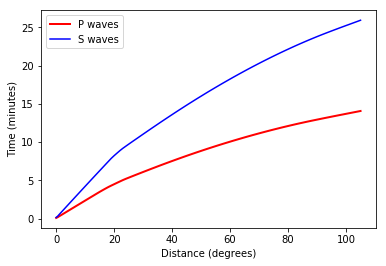

In [26]:
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.P_decimal_minutes,'r-',label='P waves',linewidth=2)
        # plots the P wave arrival as red  lines
# notice the linewidth=2? that makes the line heavier.
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.S_decimal_minutes,'b-',label='S waves') 
        # plots the S wave arrival as blue lines
plt.xlabel('Distance (degrees)') # labels the x axis
plt.ylabel('Time (minutes)'); # labels the y axis
plt.legend(loc=2); # location 2 is in the upper left hand corner

Or we could plot the data as squares and triangles

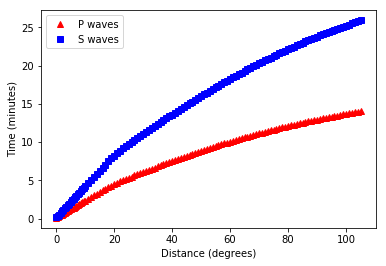

In [27]:
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.P_decimal_minutes,'r^',label='P waves')
        # plots the P wave arrival as red  triangles (^)
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.S_decimal_minutes,'bs',label='S waves') 
        # plots the S wave arrival as blue squares (s)
plt.xlabel('Distance (degrees)') # labels the x axis
plt.ylabel('Time (minutes)'); # labels the y axis
plt.legend(loc=2); # location 2 is in the upper left hand corner

Now we have two different symbols, red triangles and blue squares.  We used the **label** argument to  label the symbol types and then  use the **plt.legend()** method to place the legend onto the figure.  

But you say you only want one symbol in the legend (instead of the default two).  



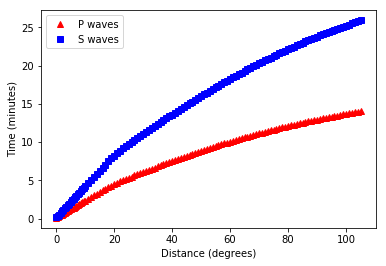

In [28]:
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.P_decimal_minutes,'r^',label='P waves')
        # plots the P wave arrival as red  triangles (^)
plt.plot(DeltaTimeData.Degrees,DeltaTimeData.S_decimal_minutes,'bs',label='S waves') 
        # plots the S wave arrival as blue squares (s)
plt.xlabel('Distance (degrees)') # labels the x axis
plt.ylabel('Time (minutes)'); # labels the y axis
plt.legend(numpoints=1,loc=2); # only one point please

In the next lecture, we will see if this model works for our seismic record by finding the time delay
between the P and S wave arrival, looking up in our DeltaTimeData DataFrame to see what angular distance is predicted and then calculating the actual great circle between the two points.  :)  

### Practice with Matplotlib pyplots
- Plot distance against the decimal minutes for both the Primary wave and the Secondary wave arrival
- Color the primary wave green and the shear wave blue 
- Include a legend with the labels "Primary Wave" and "Secondary Wave" in the lower right hand corner of your figure
- Use **help()** to learn about the matplotlib function **title()** 
- Use the function **title()** to add a title to your figure 
- Save the figure
- Remove the legend from your plot and instead insert the text "Primary wave" and "Shear wave" above the appropriate line
- Save the figure

Before we go, let's leave a nice data file to work on.  We can make a **DataFrame** of our earthquake data called **EQ**.

In [29]:
EQ=pd.DataFrame([minutes,velocity])
EQ.head()

,0,1,2,3,4,5,6,7,8,9,...,25190,25191,25192,25193,25194,25195,25196,25197,25198,25199
0,0.0,0.000833,0.001667,0.0025,0.003333,0.004167,0.005,0.005833,0.006667,0.0075,...,20.991667,20.9925,20.993333,20.994167,20.995,20.995833,20.996667,20.9975,20.998333,20.999167
1,1807.0,1749.000000,1694.000000,1618.0000,1516.000000,1394.000000,1282.000,1198.000000,1077.000000,957.0000,...,-9275.000000,-10063.0000,-10806.000000,-11515.000000,-12214.000,-12915.000000,-13599.000000,-14264.0000,-14888.000000,-15489.000000


Hmmm, that doesn't look like what we really need.  First, there are only two rows (minutes and velocity) and we want
two columns, not two rows.  To do that, we can transpose the **DataFrame**, just like a **NumPy** array:  

In [30]:
EQ=pd.DataFrame([minutes,velocity]).transpose()
EQ.head()

,0,1
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


That is better, but we would really like column headers with names, not numbers so we change the column headers with the **column** attribute (as before).    

In [31]:
EQ.columns=['Minutes','Velocity']
EQ.head()

,Minutes,Velocity
0,0.000000,1807.0
1,0.000833,1749.0
2,0.001667,1694.0
3,0.002500,1618.0
4,0.003333,1516.0


And we now we can  save our DataFrames as a file.  

In [32]:
EQ.to_csv('minutes_velocity.csv',index=None)
DeltaTimeData.to_csv('DeltaTimeData.csv',index=None)
# by setting index to None, we don't have the indices as a column in the datafile. 

Now we can safely leave this project until the next lecture.  


### Assignment #3

- Go to the IRIS website (US's national earthquake database, http://ds.iris.edu/ieb/index.html?format=text&nodata=404&starttime=1970-01-01&endtime=2025-01-01&minmag=0&maxmag=10&mindepth=0&maxdepth=900&orderby=time-desc&limit=1000&maxlat=89.18&minlat=-89.18&maxlon=180.00&minlon=-180.00&zm=1&mt=ter) and search for the last 10 earthquakes. Click on 'Other formats' to save the data to an Excel spreadsheet (you can't use Safari for this for some reason but Firefox works).  
- Open the Excel file in Excel and save it as a .csv file.
- Read this file into a Pandas DataFrame.
- Extract the latitudes,  longitudes and depths  as a NumPy array.  
- Make an XY plot with longitude on the horizontal axis and latitudes on the Y axis.  Use small red triangles as the symbols.  
- Label your axes.
